## Open files from Google Drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!ls '/gdrive/My Drive/Colab Notebooks/2-2562-DIP/text-image'

text-01.jpg  text-03.png  text-05.png  text-07.jpg  text-09.jpg
text-02.png  text-04.png  text-06.jpg  text-08.jpg  text-10.png


# ติดตั้ง Tesseract

In [0]:
!pip install pytesseract
!apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-tha
0 upgraded, 4 newly installed, 0 to remove and 7 not upgraded.
Need to get 5,693 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.com/ub

# โปรแกรมค้นหาข้อความในรูปภาพ (Search Text in Image)
ใช้โปรแกรม Tesseract เป็นหลัก

## ฟังก์ชันทั้งหมด

In [0]:
import glob
import cv2
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output

def path_image(path):
  all_files = glob.iglob(path + '*.[jp]*[g]', recursive=True)
  path_img = []   #path_img = list()  #create empty list
  for file in all_files:
    path_img.append(file)

  return path_img

def cv_read_image(path):
  img = cv2.imread(path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  return img_rgb  

def image_to_text(img, confidence=60, verbose=False):
  d = pytesseract.image_to_data(img, output_type=Output.DICT)
  n_boxes = len(d['text'])
  for i in range(n_boxes):
    if int(d['conf'][i]) > confidence:
      (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
  
  if(verbose):
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()

  return d, img

## แสดงรูปภาพตัวอักษรทั้งหมด

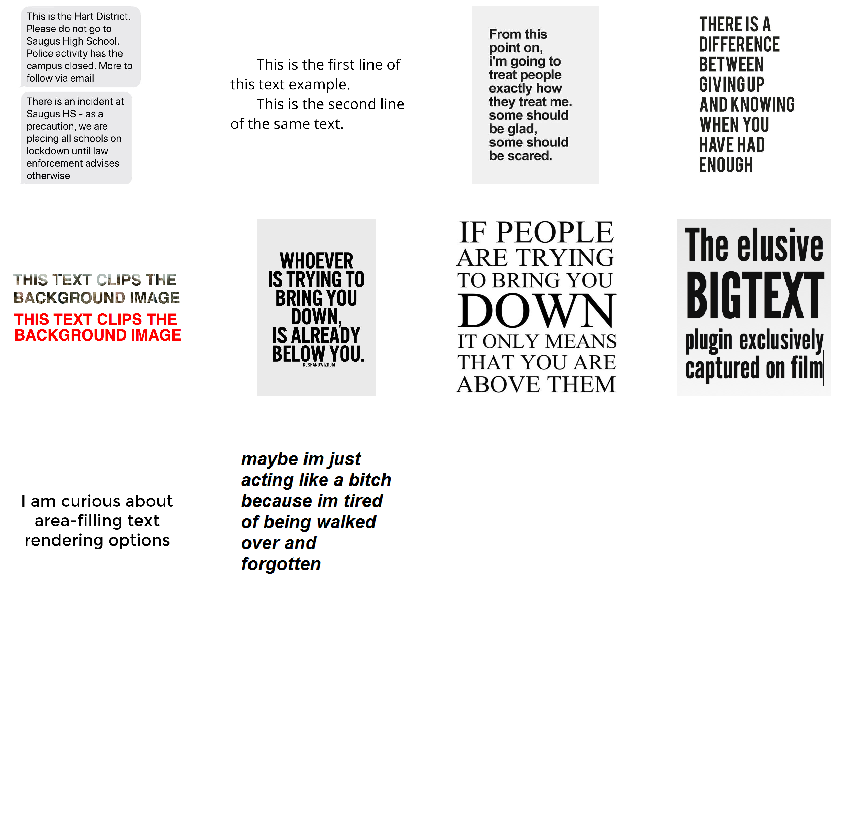

In [0]:
import math 

path = '/gdrive/My Drive/Colab Notebooks/2-2562-DIP/text-image/'
path_img = path_image(path)

r =  math.floor(math.sqrt(len(path_img))) +1
cnt=0
plt.figure(figsize=(15,15))
for i in range(1, len(path)+1):
  try:
    plt.axis('off')
    plt.subplot(r, r, i) 
    img = cv_read_image(path_img[cnt])  
    plt.imshow(img)
    cnt = cnt+1
  except:
    pass
      
plt.show()

## ตรวจหาคำ (Text detection) จากรูปภาพ

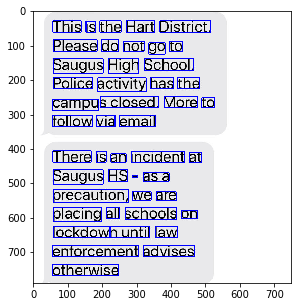

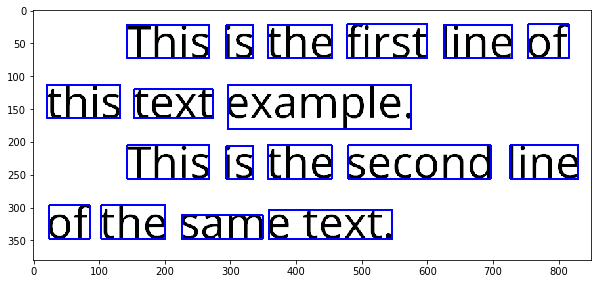

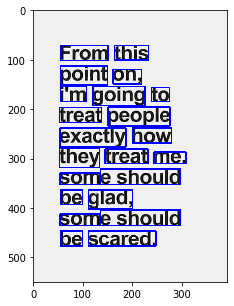

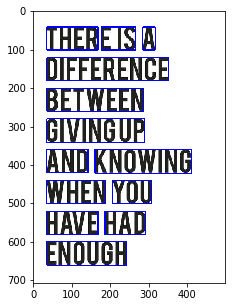

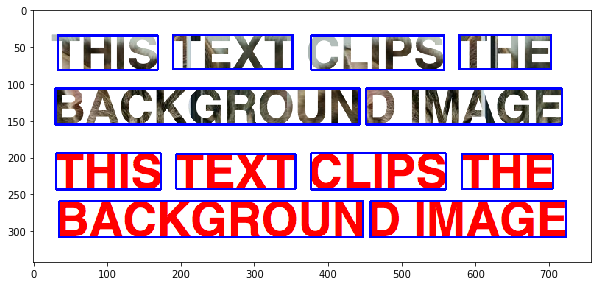

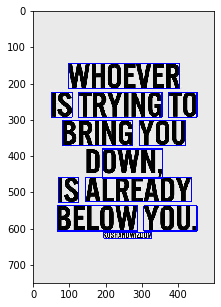

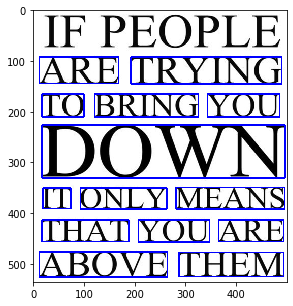

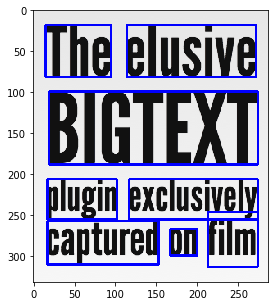

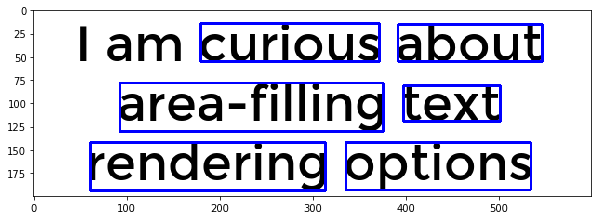

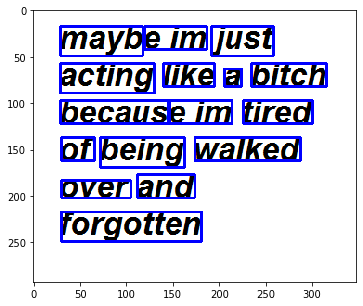

In [0]:
import numpy as np

text_data = list()
img_texts = list()

for i in range(0, len(path_img)):
  img = cv_read_image(path_img[i])
  d, img_text = image_to_text(img, confidence=60,verbose=True)
  text_data.append(d)
  img_texts.append(img_text)

## ค้นหาคำ (Search Text) ที่ต้องการโดยใช้ Regular Expression และแสดงผลลัพธ์จากการค้นหา

Searching...
Pattern: [tT][he]


[Output]

Match: This
Match: the
Match: the
Match: There
Match: otherwise



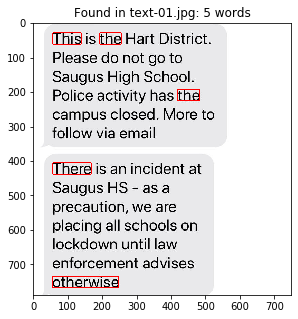


Match: This
Match: the
Match: this
Match: text
Match: This
Match: the
Match: the
Match: text.



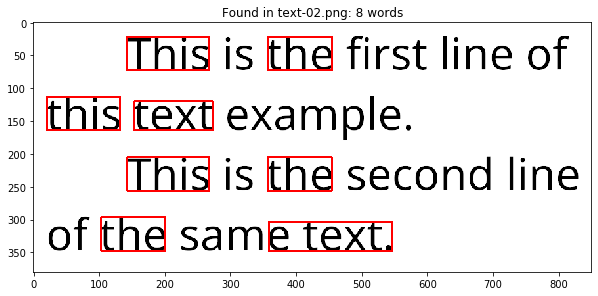


Match: this
Match: they



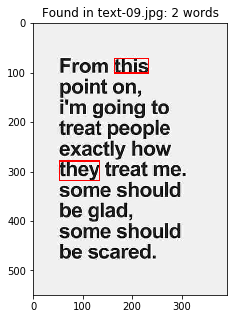


Match: The



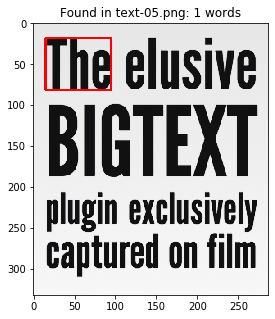


Match: text



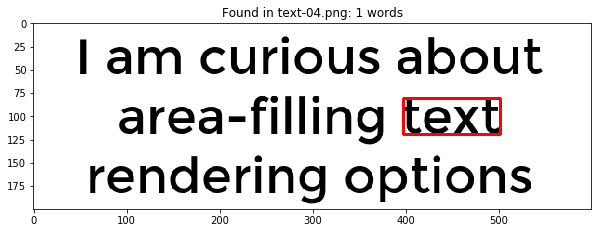


Match: forgotten



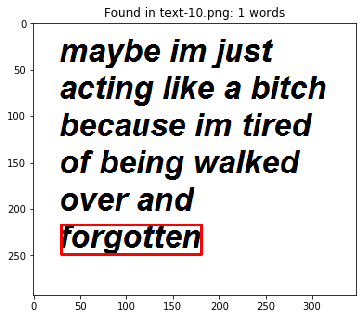

In [0]:
import re
import numpy as np

text_data = list()
img_texts = list()

# คำที่ต้องการค้นหา (เฉพาะภาษาอังกฤษ)
pattern = '[tT][he]'
#pattern = 'plugin'
print('Searching...\nPattern: {}\n'.format(pattern))

show_found_word = True

# ค้นหาคำในรูปภาพทั้งหมด
print('\n[Output]\n')
for i in range(0, len(path_img)):
  img = cv_read_image(path_img[i])
  search_img = np.array(img, copy=True)

  d, img_text = image_to_text(img, confidence=60,verbose=False)
  text_data.append(d)
  img_texts.append(img_text)
  
  n_boxes = len(text_data[i]['text'])

  chk = list()
  for ib in range(n_boxes):
    if int(text_data[i]['conf'][ib]) > 60:
      if re.search(pattern, text_data[i]['text'][ib]):
        (x, y, w, h) = (text_data[i]['left'][ib], text_data[i]['top'][ib], 
                        text_data[i]['width'][ib], text_data[i]['height'][ib])
        cv2.rectangle(search_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        if(show_found_word):
          print('Match:',text_data[i]['text'][ib])
        chk.append('Yes')

  if(len(chk) > 0):
    print()
    plt.figure(figsize=(10,5))
    plt.title('Found in ' + path_img[i].split('/')[-1]+': ' +str(len(chk)) + ' words')
    plt.imshow(search_img)
    plt.show()
    print()